# Домашнее задание 1

В этом домашнем задании мы поработаем с STL-разложением и кастмоными моделями на ваш вкус.

Большое количество банков прогнозируют спрос на наличность для каждого своего банкомата. Это важно для того чтобы банкомат всегда функционировал и в нем всегда хватало наличности. Пустой банкомат может понизить репутацию банка. Поэтому чтобы пополнить банкомат нужно вызывать инкассаторов и чем быстрее тем лучше. Вызов инкассаторов несет дополнительные издержки для банка. Поэтому не хочется вызывать инкассаторов для пополнения только одного пустого банкомата. Хочется уметь предсказывать спрос на наличность в каждом банкомате для того, чтобы загрузить в каждый банкомат при спланированном и логистически оптимальном выезде инкассаторов столько наличности, сколько нужно.
При этом после загрузки банкомата хочется уметь понимать когда примерно нужно будет снова загружать наличность в банкомат.

В данной ситуации мы делаем предположение, что банкомат работает только на СНЯТИЕ НАЛИЧНОСТИ

##### 1) Загрузка данных и визуальный анализ

Загрузите данные из файла atm.csv. Первым делом приведите ряд дат в понятный для sktime формат. Важно! sktime довольно капризен в плане форматов даты-времени. Для работы некоторых функций может требоваться PeriodIndex или DateTimeIndex. Часто самые непонятные ошибки происходят из-за этого. 

Изобразите временной ряд c помощью пакета plotly. 

Что вы можете сказать о структуре ряда? Присутствует ли в нём тренд? Сезонность? Цикличность?
Есть ли у данного ряда выбросные значения?

Разбейте данные на трейн и тест. Размер теста: последние 30 дней.

In [13]:
### Ваш код

### Блок 1. STL и наивные модели

##### Разложение

Начнём с STL. Примените на трейне STL-разложение. Обоснуйте период, который вы берёте в качестве сезонного. Визуализируйте отдельные компоненты.

In [14]:
### Ваш код

##### Прогнозирование отдельных компонент

Возьмём выделенные из STL компоненты. Построим на тренд и сезонность какие-нибудь простые модели без экзогенных признаков (на ваш вкус, в sktime есть всякое базовое, но можете и написать что-то своё). Спрогнозируйте обе компоненты на 30 дней (на тестовую выборку).
С какими проблемами вы столкнулись при прогнозировании данных на тесте?

In [4]:
### Ваш код

#### Прогнозирование остатков. 

Основные простые паттерны мы выделили и спрогнозировали. Достанем временной ряд остатков из STL-разложения трейна. Давайте попробуем построить отдельную модель прогнозирования этого временного ряда. Для начала построим какую-то очень простую модель (Например что-то типо NaiveForecaster). По кросс-валидации на трейне подберите лучшую модель NaiveForecaster для остатков, полученных после STL разложения. 

In [5]:
### Ваш код

#### Объединение компонент
Теперь мы получили три модели для прогнозирования компонент нашего ряда.
Сумма прогнозов наших моделей будет итоговым прогнозом нашего ряда.

Чтобы этим было удобно пользоваться в продакшене, давайте объединим наши модели в итоговый класс (будем называть его мета модель).
В методе fit мета модель будет производить STL разложение обучать три конкретные модели на трех компонентах после разложения.
В методе predict мета модель будет получать Forecast Horizon на вход и прогнозировать итоговый ряд спроса на наличные.

In [6]:
class NaiveModelATM:
    def __init__(self):
        ### Ваш код
        pass
    def fit(self, y):
        ### Ваш код
        pass
    def predict(self, fh):
        ### Ваш код
        pass

#### Кросс-валидация итоговой модели
Теперь давайте сделаем кросс-валидацию для нашей модели, посчитаем некоторую метрику и отобразим прогнозы нашей модели на кросс валидации.
Помните, что сделав тестовую выборку длиной 30 дней мы подразумеваем, что мы хотим прогнозировать на 30 дней и логично делать кросс-валидацию похожим образом.
Хочется видеть что-то вроде этого (можно без in-sample прогнозов). Ну и по оси X конечно же хочется видеть даты.
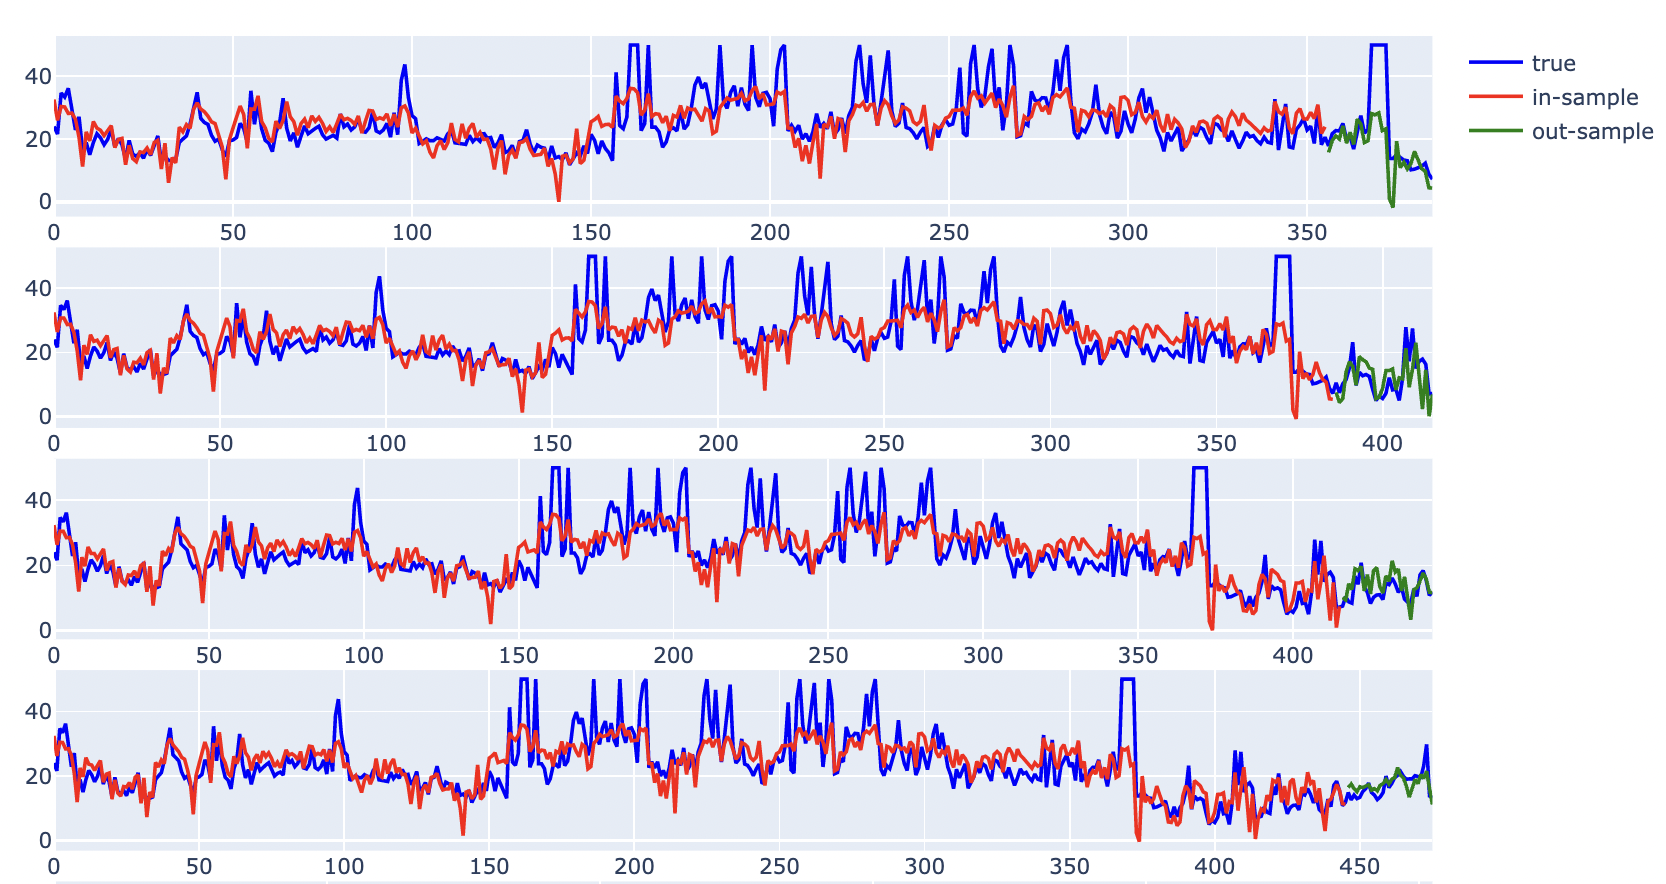

In [9]:
### Ваш код

#### Наивный прогноз на тестовой выборке
Теперь сделаем итоговый прогноз на тестовой выборке и также визуализируем его.
Выберите какую-то метрику, которую считаете нужным и посчитайте метрику на тестовой выборке.
Сохраните значение метрики качества в некоторое хранилище для сравнения с последующими моделями.

In [10]:
### Ваш код

### Блок 2. STL для прогнозирования будущего
Теперь мы предполагаем что мы хотим подобрать модель для прогнозирования спроса наличности в будущем.

#### Вспоминаем, что у нас есть даты!
Даты являются нашим лучшим другом при прогнозировании временных рядов. Фичи основанные на датах - те самые признаки которые мы знаем в будущем (по крайней мере на 30 дней вперед). Мы знаем когда будет воскресенье, когда будет Новый год и другие праздники, знаем когда будет финал чемпионата мира по хоккею.

Не будем трогать полученное STL-разложение нашего ряда. Также зафиксируем модели для тренда и сезонности которые получились в блоках выше.
А вот модель для остатков попробуем улучшить. Давайте сгенерируем фичей на основе наших дат (которые можно знать заранее) и подберем какую-то более разумную модель на основании полученных фичей. (Можно использовать обычный лин рег, бустинги и другие модели не для временных рядов). Подбирать модель будем на кросс-валидации. Необходимо сгенерировать минимум 5, а лучше 10 каких-то фичей (но не больше 10 фичей для модели).

P.S. Бустинги и леса плохо работают на рядах, в которых есть тренд, однако тут мы детрендировали ряд и обучаемся на остатках без тренда. (Если тренд конечно же есть). Также бустинги и леса плохо предсказывают значения которых не видели на тренировочной выборке, например экстремальный рост спроса на наличные из-за какого-то события. Даже если признак данного события будет подаваться на вход (например очень сильно подскочивший индекс неопределенности).

Если кто-то додумается до того, что можно сгенерить огромную кучу фичей и отобрать ровно 10 лучших признаков попадет мне прямо в сердце и получит многа баллов. Конечно же додуматься мало - нужно еще и реализовать.

В качестве результата в данном блоке необходимо представить полученную модель для остатков и список признаков.

In [13]:
### Ваш код

#### Объединение компонент 2.0

Теперь давайте объединим наши модели, как мы это делали выше, только в качестве модели для остатков будем использовать полученную в предыдущем блоке модель. И сделаем кросс-валидацию с визуализацией как в блоке выше. Также в этом блоке необходимо сделать прогноз на тестовую выборку и записать полученный результат в заведенное хранилище результатов (словарь будет неплохим вариантом).

In [15]:
class DateFeatureModelATM:
    def __init__(self):
        ### Ваш код
        pass
    def fit(self,X, y):
        ### Ваш код
        pass
    def predict(self, X):
        ### Ваш код
        pass

#### Вспоминаем, что у нас есть зависимая переменная!
В STL-разложении, которое мы сделали мы могли учесть не все типы сезонности, которые есть в исходном ряде.
Для учета данного факта мы можем использовать лагированные значения наших переменных (седьмые лаги для учета недельной сезонности и тд).
Также мы можем просто учитывать лаги нашей зависимой пременной для лучшего прогнозирования (например первый лаг) без идеи учета сезонности.
Также нам никто не мешает считать выборочные значения нашей зависимой переменной, например среднее за последние 7 дней или стандартное отклонение за последние N дней и тд.

В данном блоке предполагается сгенерировать как минимум 3 признака, связанных с лагами зависимой переменной.
И как минимум 3 признака, связанных с некоторыми выборочными статистиками предыдущих значений зависимой переменной (среднее за последние N дней, максимум за последние N дней, минимум за последие K дней и тд).

Реализуйте какую-то процедуру отбора 2-3 лучших признаков и подберите лучшую модель на них по кросс валидации.

In [17]:
### Ваш код

#### Рекурсивный прогноз

Но вот незадача: предположим, что мы используем первый лаг нашей зависимой переменной в качестве признака. Мы делаем прогноз на день вперед и ... не понимаем как сделать прогноз на второй день вперед, ведь теперь теперь у нас нет значения первого лага. В данном блоке предполагается использовать прогнозные значения в качестве зависимой переменной будущего (рекурсивная стратегия прогнозирования).

Предположим, что у нас есть модель: $$ \hat{y}_{t} = \alpha + \beta \cdot y_{t-1} $$
Тогда $$ \hat{y}_{t+1} = \alpha + \beta \cdot \hat{y_{t}} $$
И так далее в будущее...

Реализуйте класс вашей модели, которая будет делать итеративный прогноз вперед в будущее пересчитывая нужные фичи (модель только для ряда остатков).
Внизу представлен простейший пример реализации такой модели с первым лагом зависимой переменной (из которого явно видны проблемы такого подхода) однако на коротких горизонтах бывает весьма полезно.
Проверьте реализацию на каких-то значениях.

P.S. любая работающая реализация приветсвуется, даже очень корявенькая (как в принципе в примере ниже)

In [68]:
from sklearn.linear_model import LinearRegression
from sktime.datasets import load_airline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
y = load_airline()
y_train = y[:-20]
y_test = y[-20:]

class IterativeModel:
    def __init__(self):
        self._model = LinearRegression()
        
    def fit(self,y):
        # генерируем первые лаги
        y_shift_1 = y.shift(1).fillna(0)
        
        # обучаем модель
        self._model.fit(X = y_shift_1.values[:,np.newaxis], y=y)
        # запоминаем последнее значение
        self.last_value = y[-1]
        
    def predict(self,fh):
        y_hat = []
        for date in fh:
            y_hat_current = self._model.predict([[self.last_value]])[0]
            y_hat.append(y_hat_current)
            self.last_value = y_hat_current
        y_hat = pd.Series(data = y_hat, index = fh)
        return y_hat

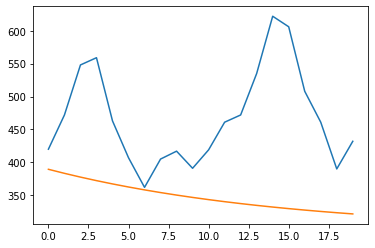

In [69]:
mod = IterativeModel()
mod.fit(y_train)
y_hat = mod.predict(y_test.index)
plt.plot(y_test.values)
plt.plot(y_hat.values)

In [71]:
class IterativeModelATM:
    ### Ваш код
    pass

#### Объединение признаков

В этом блоке вам предлагается использовать как признаки основанные на датах, так и сгенеренные значения зависимой переменной.
Реализуйте класс вашей модели. Опять же модель, только для остатков

In [73]:
class FeatureIterativeModelATM:
    
    def __init__(self):
        ### Ваш код
        pass
    def fit(self,X, y):
        ### Ваш код
        pass
    def predict(self, X):
        ### Ваш код
        pass

#### Объединение компонент 3.0
Мы получили модель, которая работает и на фичах, основанных на датах, и на фичах, основанных на зависимой переменной.

Теперь давайте сделаем все то же самое, что и в блоке объединение компонент 2.0, только с обновленной моделью для остатков.

In [74]:
### Ваш код

### Блок 3. Прогнозирование прошлого

Теперь предположим, что какое-то время  назад мы загрузили какую-то наличность в банкомат. Предположим, что банкомат очень старый и он не передает нам онлайн данные о том, сколько денег в нем осталось. При этом нам хочется примерно понимать какой был спрос на наличные. Поэтому мы обращаемся к нашей модели, чтобы примерно предсказать сколько денег снимали в данном банкомате по дням.

С точки зрения обучения модели для нас ничего не меняется. 
C точки зрения предикта меняется многое: мы знаем значения любых доступных признаков. Например: неделю назад мы загрузили наличность, и знаем, что два дня назад произошел скачек индекса неопределенности, от которого так зависит спрос на наличные. К счастью модель для данного банкомата была обучена на этом признаке и мы можем примерно предсказать, каким был спрос на наличные за последнюю неделю, подав модели на вход даты последних семи дней и значения индекса неопределенности также за последние семь дней.

В блоке ниже реализуйте любую модель на ваше усмотрение (тут можно забыть про парадигму STL), которая использует любые экзогенные факторы и предсказывает спрос на нашу наличность. В качестве факторов можно взять календарные признаки, сгенеренные значения зависимой переменной, а также любые индексы, макроэкономические данные, которые могут объяснять спрос на наличность в нашем банкомате.

Для полученной модели сделайте кросс валидацию с визуализацией прогнозов, а также предсказание на тесте с подсчетом метрики.
Получилось ли побить результаты предыдущих моделей? Если да, то за счет чего? Если нет, то сделайте, чтобы было да.

### Блок 4. Кастомная модель под запросы бизнеса

Теперь перейдем к более прикладным вещам. У бизнеса есть прямой запрос. К вам подходит глава бизнес подразделения и говорит: спрогнозируйте нам дату, в которую наличность в банкомате закончится?
Получается при прогнозе у вас есть три признака:
1. Дата загрузки наличности в банкомат
2. Объем наличности, который был загружен в рублях
3. Дата из которой делается прогноз

Вам нужно выдать на выход дату, когда закончится наличность в банкомате.

Также модель нужно грамотно отвалидировать и подобрать хорошие метрики, которые можно интерпретировать для заказчика. Аналитика работы модели приветствуется.

ДВЕ лучшие работы в данном блоке (при условии того, что предыдущие блоки будут выполнено адекватно) сразу получат АВТОМАТЫ с оценкой 10.

P.S. тот факт, что дата загрузки наличности в банкомат может быть раньше чем дата, из которой делается прогноз можно по-умному учесть

In [76]:
class CustomBusinessModel:
    def __init__(self):
        ### Ваш код
        pass
    def fit(self,X,y):
        ### Ваш код
        pass
    def predict(self, cash_delivery_date, cash_amount, predict_date):
        ### Ваш код
        pass